In [17]:
#read the file
seaflow <- read.csv(file='seaflow_21min.csv')
head(seaflow)

file_id,time,cell_id,d1,d2,fsc_small,fsc_perp,fsc_big,pe,chl_small,chl_big,pop
203,12,1,25344,27968,34677,14944,32400,2216,28237,5072,pico
203,12,4,12960,22144,37275,20440,32400,1795,36755,14224,ultra
203,12,6,21424,23008,31725,11253,32384,1901,26640,0,pico
203,12,9,7712,14528,28744,10219,32416,1248,35392,10704,ultra
203,12,11,30368,21440,28861,6101,32400,12989,23421,5920,synecho
203,12,15,30032,22704,31221,13488,32400,1883,27323,6560,pico


In [12]:
# summarize the data
#overall counts for each category of particle
summary(seaflow)

    file_id           time          cell_id            d1       
 Min.   :203.0   Min.   : 12.0   Min.   :    0   Min.   : 1328  
 1st Qu.:204.0   1st Qu.:174.0   1st Qu.: 7486   1st Qu.: 7296  
 Median :206.0   Median :362.0   Median :14995   Median :17728  
 Mean   :206.2   Mean   :341.5   Mean   :15008   Mean   :17039  
 3rd Qu.:208.0   3rd Qu.:503.0   3rd Qu.:22401   3rd Qu.:24512  
 Max.   :209.0   Max.   :643.0   Max.   :32081   Max.   :54048  
       d2          fsc_small        fsc_perp        fsc_big     
 Min.   :   32   Min.   :10005   Min.   :    0   Min.   :32384  
 1st Qu.: 9584   1st Qu.:31341   1st Qu.:13496   1st Qu.:32400  
 Median :18512   Median :35483   Median :18069   Median :32400  
 Mean   :17437   Mean   :34919   Mean   :17646   Mean   :32405  
 3rd Qu.:24656   3rd Qu.:39184   3rd Qu.:22243   3rd Qu.:32416  
 Max.   :54688   Max.   :65424   Max.   :63456   Max.   :32464  
       pe          chl_small        chl_big           pop       
 Min.   :    0   Min.   :

In [20]:
#Split the data into test and training sets
train_index <- sample(1:nrow(seaflow), 0.8 * nrow(seaflow))
test_index <- setdiff(1:nrow(seaflow), train_index)

In [74]:
X_train <- seaflow[train_index,-13]
y_train <- seaflow[train_index, "pop"]

X_test <- seaflow[test_index, -13]
y_text <- seaflow[train_index, "pop"]

In [75]:
summary(X_train)

    file_id           time          cell_id            d1       
 Min.   :203.0   Min.   : 12.0   Min.   :    0   Min.   : 1328  
 1st Qu.:204.0   1st Qu.:174.0   1st Qu.: 7507   1st Qu.: 7280  
 Median :206.0   Median :360.0   Median :15057   Median :17680  
 Mean   :206.1   Mean   :340.9   Mean   :15036   Mean   :17015  
 3rd Qu.:208.0   3rd Qu.:502.0   3rd Qu.:22436   3rd Qu.:24480  
 Max.   :209.0   Max.   :643.0   Max.   :32081   Max.   :54048  
       d2          fsc_small        fsc_perp        fsc_big     
 Min.   :   32   Min.   :10005   Min.   :    0   Min.   :32384  
 1st Qu.: 9568   1st Qu.:31333   1st Qu.:13475   1st Qu.:32400  
 Median :18480   Median :35466   Median :18059   Median :32400  
 Mean   :17418   Mean   :34903   Mean   :17629   Mean   :32405  
 3rd Qu.:24656   3rd Qu.:39152   3rd Qu.:22232   3rd Qu.:32416  
 Max.   :54688   Max.   :65424   Max.   :63456   Max.   :32464  
       pe          chl_small        chl_big           pop       
 Min.   :    0   Min.   :

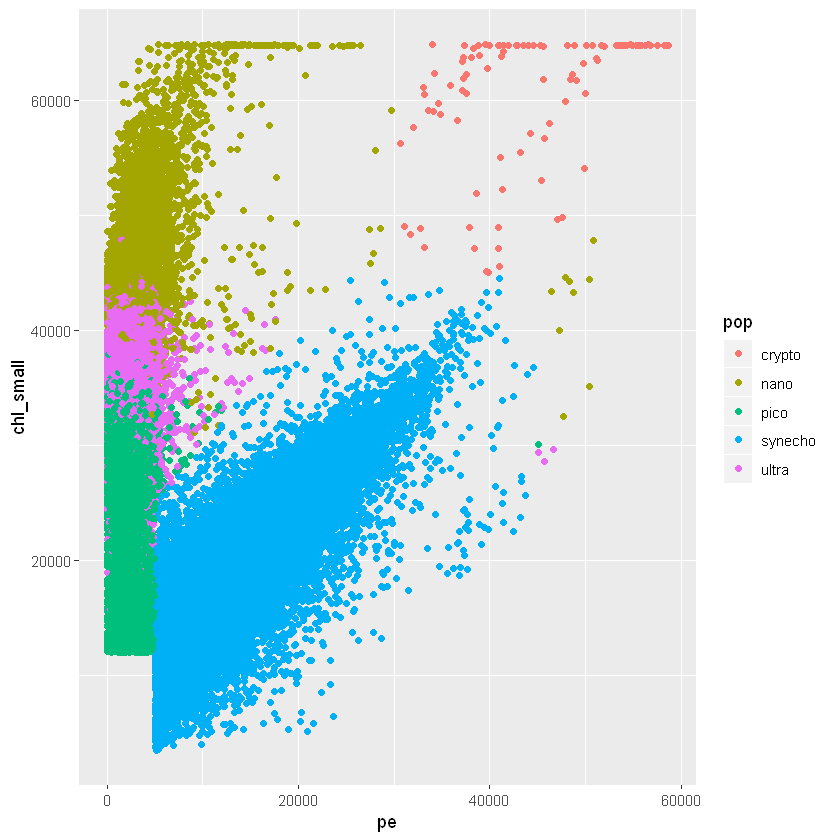

In [76]:
# Plot the data pe against chl_small and color by pop
library(ggplot2)
ggplot(seaflow, aes(x=pe, y=chl_small,color=pop)) +geom_point()
# ultra appear to be somewhat "mixed" with two other populations of particles

In [97]:
#Train a decision tree
library(rpart)

fol <- formula(pop ~ fsc_small + fsc_perp + fsc_big + pe + chl_big + chl_small)

model <- rpart(fol, method="class", data=X_train)

print(model)

n= 57874 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 57874 41110 pico (0.0014 0.17 0.29 0.25 0.28)  
   2) pe< 5004 42201 25517 pico (0 0.22 0.4 4.7e-05 0.38)  
     4) chl_small< 32164 18204  3081 pico (0 0.00016 0.83 0.00011 0.17) *
     5) chl_small>=32164 23997 10837 ultra (0 0.39 0.065 0 0.55)  
      10) chl_small>=41297.5 8287  1071 nano (0 0.87 0.00012 0 0.13) *
      11) chl_small< 41297.5 15710  3620 ultra (0 0.13 0.099 0 0.77) *
   3) pe>=5004 15673  1236 synecho (0.0052 0.053 0.0051 0.92 0.015)  
     6) chl_small>=38255 1027   210 nano (0.08 0.8 0 0.06 0.064) *
     7) chl_small< 38255 14646   271 synecho (0 0.0014 0.0055 0.98 0.012) *


In [98]:
#Evaluate the decision tree on the test data.

pred <- predict(model, newdata=X_test, type="class")

count <- pred == X_test$pop

accuracy <- sum(count)/length(count)

accuracy

[1] 0.8552077

In [99]:
#Build and evaluate a random forest.
#install.packages("randomForest")
library(randomForest)
model_RF <- randomForest(fol, data=X_train)

pred_RF <- predict(model_RF, newdata=X_test, type="class")

correct_pred <- pred_RF == X_test$pop

acc_RF <- sum(correct_pred)/length(correct_pred)

acc_RF

[1] 0.9200359

In [100]:
#The function importance(model) prints the mean decrease in gini importance for each variable
importance(model_RF)

,MeanDecreaseGini
fsc_small,4261.0631
fsc_perp,3291.4179
fsc_big,322.3966
pe,14075.1308
chl_big,7713.5544
chl_small,13289.6579


In [101]:
#Train a support vector machine model and compare results.
#install.packages("e1071")
library(e1071)

model_svm <- svm(fol, data=X_train)

pred_svm <- predict(model_svm, newdata=X_test, type="class")

correct_pred_svm <- pred_svm == X_test$pop

acc_svm <- sum(correct_pred_svm)/length(correct_pred_svm)

acc_svm

[1] 0.9191375

In [104]:
#Construct confusion matrices
cm_tree <- table(tree = pred, true = X_test$pop)
cm_rf <- table(RF = pred_RF, true = X_test$pop)
cm_svm <- table(svm = pred_svm, true = X_test$pop)

In [105]:
cm_tree

         true
tree      crypto nano pico synecho ultra
  crypto       0    0    0       0     0
  nano        20 2030    0      15   271
  pico         0    1 3710       0   815
  synecho      0    6   12    3692    37
  ultra        0  544  374       0  2942

In [106]:
cm_rf

         true
RF        crypto nano pico synecho ultra
  crypto      20    0    0       0     0
  nano         0 2239    0       2   124
  pico         0    0 3962       0   552
  synecho      0    1    2    3705     3
  ultra        0  341  132       0  3386

In [107]:
cm_svm

         true
svm       crypto nano pico synecho ultra
  crypto      18    0    0       0     0
  nano         2 2274    0       1   136
  pico         0    0 3931       7   548
  synecho      0    0   25    3699     4
  ultra        0  307  140       0  3377

In [ ]:
#Sanity check the data



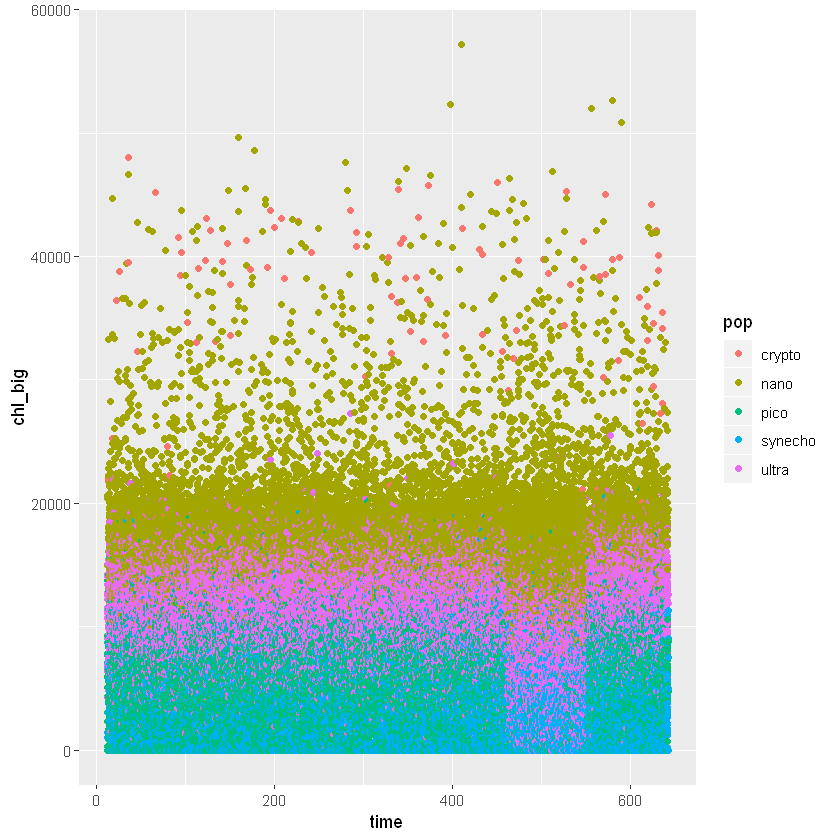

In [108]:
#Plot time vs. chl_big
ggplot(seaflow, aes(x=time, y=chl_big,color=pop)) +geom_point()

In [115]:
#install.packages('caret')
library(caret)
data_clean <- seaflow[seaflow$file_id != 208,]
trainIndices_clean <- createDataPartition(data_clean$file_id, p=.8, list=FALSE, times=1)
dataTrain_clean <- data_clean[ trainIndices_clean,]
dataTest_clean  <- data_clean[-trainIndices_clean,]

model_svm_clean <- svm(fol, data=dataTrain_clean)
preds_svm_clean <- predict(model_svm_clean, newdata=dataTest_clean, type="class")
ab <- preds_svm_clean == dataTest_clean$pop
accuracy_svm_clean <- sum(ab) / length(ab)

improvement <- accuracy_svm_clean - acc_svm
improvement

[1] 0.04995179